


# Vamos encher o carrinho!

# Introdução

O Instacart é uma plataforma de entrega de supermercado onde os clientes podem fazer um pedido no supermercado e depois receber sua compra, semelhante ao funcionamento do Uber Eats e do iFood. O conjunto de dados que fornecemos foi modificado a partir do original. Reduzimos o tamanho dele para que seus cálculos sejam executados mais rapidamente e incluímos valores ausentes e duplicados. Também tivemos o cuidado de preservar as distribuições dos dados originais quando fizemos as alterações.

Você precisa completar três etapas. Para cada uma delas, escreva uma breve introdução descrevendo como você pretende concluir a etapa e justifique suas decisões em parágrafos explicativos a medida que você avança na solução. Escreva também uma conclusão para resumir suas conclusões e escolhas.



## Dicionário de dados

Há cinco tabelas no conjunto de dados, e você vai precisar usar todas elas para pré-processar seus dados e fazer AED. Abaixo está um dicionário que lista as colunas de cada tabela e descreve os dados contidos nelas.

- `instacart_orders.csv`: cada linha corresponde a um pedido no aplicativo da Instacart
    - `'order_id'`: é o número que identifica cada pedido de forma exclusiva
    - `'user_id'`: é o número de identificação exclusivo da conta de cada cliente
    - `'order_number'`: é o número de vezes que o cliente fez um pedido
    - `'order_dow'`: é o dia da semana em que o pedido foi feito (0 é domingo)
    - `'order_hour_of_day'`: é a hora do dia em que o pedido foi feito
    - `'days_since_prior_order'`: é o número de dias desde que o cliente fez seu pedido anterior




- `products.csv`: cada linha corresponde a um produto exclusivo que os clientes podem comprar
    - `'product_id'`: é o número de identificação unívoco de cada produto
    - `'product_name'`: é o nome do produto
    - `'aisle_id'`: é o número de identificação exclusivo de cada categoria de corredor do supermercado
    - `'department_id'`: é o número de identificação exclusivo de cada categoria de departamento do supermercado




-	`order_products.csv`: cada linha corresponde a um item incluído em um pedido
    -	`'order_id'`: é o número que identifica cada pedido de forma exclusiva
    -	`'product_id'`: é o número de identificação exclusivo de cada produto
    -	`'add_to_cart_order'`: é a ordem sequencial em que cada item foi colocado no carrinho
    -	`'reordered'`: 0 se o cliente nunca comprou o produto antes, 1 se já o comprou




-	`aisles.csv`
    -	`'aisle_id'`: é o número de identificação exclusivo de cada categoria de corredor do supermercado
    -	`'aisle'`: é o nome do corredor



-	`departments.csv`
    -	`'department_id'`: é o número de identificação exclusivo de cada categoria de departamento do supermercado
    -	`'department'`: é o nome do departamento


# Etapa 1. Visão geral dos dados

Leia os arquivos de dados (/datasets/instacart_orders.csv, /datasets/products.csv, /datasets/aisles.csv, /datasets/departments.csv e /datasets/order_products.csv) com `pd.read_csv()` usando os parâmetros apropriados para fazer isso corretamente. Verifique as informações para cada DataFrame criado.


## Plano de solução

Escreva aqui seu plano para a Etapa 2. Visão geral dos dados

In [56]:
# Importe as bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns




In [57]:
# leia os conjuntos de dados em DataFrames
df_products = pd.read_csv('products (1).csv', sep=';')
df_inscart_orders = pd.read_csv('instacart_orders.csv', sep=';')


df_aisles = pd.read_csv('aisles.csv', sep=';')
df_departments = pd.read_csv('departments.csv', sep=';')
df_orders_products = pd.read_csv('order_products.csv.zip', compression='zip', sep=';')

In [58]:
# imprima as informações sobre o DataFrame

df_products.info()
#valores nulos 1258 e nnenhum duplicado


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49694 entries, 0 to 49693
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   product_id     49694 non-null  int64 
 1   product_name   48436 non-null  object
 2   aisle_id       49694 non-null  int64 
 3   department_id  49694 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB


In [59]:
# imprima as informações sobre o DataFrame

df_inscart_orders.head()


#valores nulos 28819 e 15 duplicados, obs: valor de order_hour e int***

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,1515936,183418,11,6,13,30.0
1,1690866,163593,5,5,12,9.0
2,1454967,39980,4,5,19,2.0
3,1768857,82516,56,0,20,10.0
4,3007858,196724,2,4,12,17.0


In [60]:
# imprima as informações sobre o DataFrame

df_aisles.info()

#nao tem valores nulos e nem duplicados, dtypes ok!

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134 entries, 0 to 133
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   aisle_id  134 non-null    int64 
 1   aisle     134 non-null    object
dtypes: int64(1), object(1)
memory usage: 2.2+ KB


In [61]:
# imprima as informações sobre o DataFrame
df_orders_products.info()
df_orders_products.head()

#valores nulos 836,  duplicados 0, dtypes ok!

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4545007 entries, 0 to 4545006
Data columns (total 4 columns):
 #   Column             Dtype  
---  ------             -----  
 0   order_id           int64  
 1   product_id         int64  
 2   add_to_cart_order  float64
 3   reordered          int64  
dtypes: float64(1), int64(3)
memory usage: 138.7 MB


,order_id,product_id,add_to_cart_order,reordered
0,2141543,11440,17.0,0
1,567889,1560,1.0,1
2,2261212,26683,1.0,1
3,491251,8670,35.0,1
4,2571142,1940,5.0,1


In [62]:
# imprima as informações sobre o DataFrame

df_departments.dtypes
#nao tem valores nulos e tambem nao tem duplicados, dtypes ok!

department_id     int64
department       object
dtype: object

## Conclusões

Escreva aqui suas conclusões intermediárias da Etapa 1. Visão geral dos dados

Tem alguns dataframes com valores nulos a serem tratados, tambem com duplicados. os dtypes ate entao estao ok, preciso verifica se order hour que e int vai me atrapalhar XD 

# Etapa 2. Preparação de dados

Faça o pré-processamento dos dados da seguinte maneira:

-	Verifique e corrija os tipos de dados (por exemplo, certifique-se de que as colunas de ID sejam números inteiros)
-	Identifique e preencha valores ausentes
-	Identifique e remova valores duplicados

Certifique-se de explicar que tipos de valores ausentes e duplicados você encontrou, como você os preencheu ou removeu, por que escolheu esses métodos e por que você acha que esses valores ausentes e duplicados estavam presentes no conjunto de dados.

## Plano de solução

Escreva aqui seu plano para a Etapa 2. Preparação de dados

## Encontre e remova valores duplicados (e descreva por que você está fazendo suas escolhas)

### DataFrame `instacart_orders`

In [63]:
# Verificar se há pedidos duplicados
df_inscart_orders[df_inscart_orders.duplicated()]


,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
145574,794638,50898,24,3,2,2.0
223105,2160484,107525,16,3,2,30.0
230807,1918001,188546,14,3,2,16.0
266232,1782114,106752,1,3,2,NaN
273805,1112182,202304,84,3,2,6.0
284038,2845099,31189,11,3,2,7.0
311713,1021560,53767,3,3,2,9.0
321100,408114,68324,4,3,2,18.0
323900,1919531,191501,32,3,2,7.0
345917,2232988,82565,1,3,2,NaN


Há linhas duplicadas? Se sim, o que elas têm em comum?

In [64]:
# Com base nas suas conclusões, Todos os pedidos duplicados de df_inscart_orders foram feitos aos domingos as 2 horas. 

# verifique todos os pedidos feitos às 2h da manhã nas quartas-feiras

df_inscart_orders[(df_inscart_orders['order_hour_of_day'] == 2) & (df_inscart_orders['order_dow'] == 3)]

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
4838,2766110,162084,41,3,2,16.0
5156,2190225,138285,18,3,2,11.0
15506,553049,58599,13,3,2,7.0
18420,382357,120200,19,3,2,11.0
24691,690242,77357,2,3,2,9.0
...,...,...,...,...,...,...
457013,3384021,14881,6,3,2,30.0
458816,910166,164782,18,3,2,4.0
459635,1680532,106435,6,3,2,21.0
468324,222962,54979,59,3,2,3.0


O que esse resultado quer dizer? 

que foram feitos 121 pedidos a 2h da manhã nas quartas-feiras

In [65]:
# Remova pedidos duplicados
df_inscart_orders = df_inscart_orders.drop_duplicates()

In [66]:
# Verifique as linhas duplicadas mais uma vez
df_inscart_orders.duplicated().sum()

np.int64(0)

In [67]:
# Verifique novamente apenas os IDs de pedidos duplicados
df_inscart_orders[df_inscart_orders.duplicated(subset=['order_id'])]

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order




Descreva brevemente suas conclusões e o que você fez com elas.

Tinha pedidos duplicados com um padrao de ser sempre no mesmo horario e o mesmo dia, talvez um bug do sistema, mas não há mais valores duplicados.

### DataFrame `products`

In [68]:
# Verifique se há linhas completamente duplicadas
df_products[df_products.duplicated()]

,product_id,product_name,aisle_id,department_id


In [69]:
# Verifique apenas IDs dos produtos duplicados
df_products[df_products.duplicated(subset=['product_id'])]

,product_id,product_name,aisle_id,department_id


In [70]:
# Verifique apenas nomes de produtos duplicados (converta os nomes para minúsculas para uma comparação melhor)
df_products[df_products['product_name'].str.lower().duplicated()]
# Verifique apenas IDs de produtos duplicados


,product_id,product_name,aisle_id,department_id
71,72,NaN,100,21
109,110,NaN,100,21
296,297,NaN,100,21
416,417,NaN,100,21
436,437,NaN,100,21
...,...,...,...,...
49689,49690,HIGH PERFORMANCE ENERGY DRINK,64,7
49690,49691,ORIGINAL PANCAKE & WAFFLE MIX,130,14
49691,49692,ORGANIC INSTANT OATMEAL LIGHT MAPLE BROWN SUGAR,130,14
49692,49693,SPRING WATER BODY WASH,127,11


In [71]:
# Verifique os nomes de produtos duplicados que não estão faltando
df_products[df_products['product_name'].str.lower().duplicated(keep=False) & df_products['product_name'].notnull()]

,product_id,product_name,aisle_id,department_id
41,42,Biotin 1000 mcg,47,11
185,186,Fresh Scent Dishwasher Detergent with Dawn,74,17
515,516,American Cheese Slices,21,16
1538,1539,Cauliflower head,83,4
1783,1784,NUTrition Protein Mix Blueberry Nut,117,19
...,...,...,...,...
49689,49690,HIGH PERFORMANCE ENERGY DRINK,64,7
49690,49691,ORIGINAL PANCAKE & WAFFLE MIX,130,14
49691,49692,ORGANIC INSTANT OATMEAL LIGHT MAPLE BROWN SUGAR,130,14
49692,49693,SPRING WATER BODY WASH,127,11


Descreva brevemente suas conclusões e o que você fez com elas.

esse aqui tem muito nome faltando, talvez nao seja problema pois temos o id do produto, Vamos ve hehe 

### DataFrame `departments`

In [72]:
# Verifique se há linhas completamente duplicadas
df_departments.duplicated().sum()

np.int64(0)

In [73]:
# Verifique apenas se há IDs dos produtos duplicados
df_departments[df_departments.duplicated(subset=['department_id'])]

,department_id,department


Descreva brevemente suas conclusões e o que você fez com elas.

Ta tranquilo! segue sem linhas duplicadas 

### DataFrame `aisles`

In [74]:
# Verifique se há linhas completamente duplicadas
df_aisles.duplicated().sum()

np.int64(0)

In [75]:
# Verifique apenas se há IDs dos produtos duplicados
df_aisles[df_aisles.duplicated(subset=['aisle_id'])]

,aisle_id,aisle


Descreva brevemente suas conclusões e o que você fez com elas.

Tudo numa boa aqui tbm, sem duplicado

### DataFrame `order_products`

In [76]:
# Verifique se há linhas completamente duplicadas
df_orders_products.duplicated().sum()

np.int64(0)

In [77]:
# Verifique mais uma vez se há outros casos complicados de duplicados
df_orders_products.duplicated(subset=['order_id', 'product_id']).sum()

np.int64(0)

Descreva brevemente suas conclusões e o que você fez com elas.

minha conclusao e que nao tem nenhum duplicado. seguimos


## Encontre e remova valores ausentes


Ao processarmos valores duplicados, observamos que também temos valores ausentes que precisamos investigar nas seguintes colunas:

*	A coluna `'product_name'` da tabela products.
*	A coluna `'days_since_prior_order'` da tabela orders.
*	A coluna `'add_to_cart_order'` da tabela order_products.


### DataFrame `products`

In [78]:
# Encontre valores ausentes na coluna 'product_name'
df_products[df_products['product_name'].isnull()]

,product_id,product_name,aisle_id,department_id
37,38,NaN,100,21
71,72,NaN,100,21
109,110,NaN,100,21
296,297,NaN,100,21
416,417,NaN,100,21
...,...,...,...,...
49552,49553,NaN,100,21
49574,49575,NaN,100,21
49640,49641,NaN,100,21
49663,49664,NaN,100,21


Descreva brevemente suas conclusões.

temos 1258 linhas aonde product name esta nulo XD

In [79]:
# Todos os nomes de produtos ausentes estão associados com o corredor de ID 100?
df_products[df_products['aisle_id'] == 100]['product_name'].isnull().sum()

np.int64(1258)

Descreva brevemente suas conclusões.

Incrivelmente sim O_o

In [80]:
# Todos os nomes de produtos ausentes estão associados com o departamento de ID 21? 
df_products[df_products['department_id'] == 21]['product_name'].isnull().sum()


np.int64(1258)

Tambem, esta tudo interligado !!!! 

Descreva brevemente suas conclusões.

In [81]:
# Use as tabelas department e aisle para verificar os dados do corredor com ID 100 e do departamento com ID 21.
aisle_100 = df_aisles[df_aisles['aisle_id'] == 100]
department_21 = df_departments[df_departments['department_id'] == 21]

print(aisle_100)
print(department_21)



    aisle_id    aisle
99       100  missing
    department_id department
20             21    missing


Descreva brevemente suas conclusões.

parece que o departamento 21 esta com o valor de missing, pode ser que seja por que nao tem nenhum tipo de categoria aquele produto ..

In [82]:
# Preencha nomes de produtos ausentes com 'Unknown'
df_products['product_name'] = df_products['product_name'].fillna('Unknown')
df_products[df_products['product_name'].isnull()]

,product_id,product_name,aisle_id,department_id


Descreva brevemente suas conclusões e o que você fez com elas.

troquei todos os valores de missing por 'Unknown' 

### DataFrame `orders`

In [83]:
# Encontre os valores ausentes
df_orders_products[df_orders_products['add_to_cart_order'].isnull()]

,order_id,product_id,add_to_cart_order,reordered
737,2449164,5068,NaN,0
9926,1968313,43867,NaN,0
14394,2926893,11688,NaN,0
16418,1717990,4142,NaN,0
30114,1959075,42828,NaN,1
...,...,...,...,...
4505662,1800005,7411,NaN,0
4511400,1633337,260,NaN,0
4517562,404157,9517,NaN,0
4534112,1673227,17835,NaN,0


In [84]:
# Há valores ausentes para os clientes que não estão fazendo o primeiro pedido? 
df_orders_products[df_orders_products['reordered'] == 1]['add_to_cart_order'].isnull().sum()


np.int64(319)

Descreva brevemente suas conclusões e o que você fez com elas.

tenho 319 valores nulos de que cliente que nao estao fazendo a primeira compra/pedido ... 

### DataFrame `order_products`

In [85]:
# Encontre os valores ausentes
df_orders_products.isnull().sum()

order_id               0
product_id             0
add_to_cart_order    836
reordered              0
dtype: int64

In [86]:
# Quais são os valores mínimo e máximo dessa coluna?
df_orders_products['add_to_cart_order'].min(), df_orders_products['add_to_cart_order'].max()

(np.float64(1.0), np.float64(64.0))

Descreva brevemente suas conclusões.

1 minimo, e 64 max... 

In [87]:
# Salve todos os IDs dos pedidos com pelo menos um valor ausente em 'add_to_cart_order'
missing_add_to_cart_order = df_orders_products[df_orders_products['add_to_cart_order'].isnull()]['order_id'].unique()

In [90]:
# Todos os pedidos com valores ausentes contêm mais de 64 produtos?
# Agrupe os pedidos com dados ausentes por ID de pedido
# Conte o número de 'product_id' em cada pedido e verifique o valor mínimo da contagem
missing_add_to_cart = df_orders_products[df_orders_products['add_to_cart_order'].isnull()]["order_id"].unique()
product_counts = df_orders_products[df_orders_products["order_id"].isin(missing_add_to_cart)].groupby('order_id')['product_id'].count()
min_products = product_counts.min()
all_above_64 = min_products > 64
#CONCLUSAO: SIM, todos os pedidos com dados ausentes tem mais de 64 produtos
print(f"Menor quantidade de produtos entre os pedidos com dados ausentes: {min_products}")
print(f"Todos têm mais de 64 produtos? {all_above_64}")

product_counts.head()


Menor quantidade de produtos entre os pedidos com dados ausentes: 65
Todos têm mais de 64 produtos? True


order_id
9310       65
61355     127
102236     95
129627     69
165801     70
Name: product_id, dtype: int64

Descreva brevemente suas conclusões.

Menor quantidade de produtos entre os pedidos com dados ausentes: 1
Todos têm mais de 64 produtos? False

repeat Print XD

In [34]:
# Substitua valores ausentes na coluna 'add_to_cart_order' por 999 e converta a coluna para o tipo integer
df_orders_products['add_to_cart_order'] = df_orders_products['add_to_cart_order'].fillna(999).astype(int)


Descreva brevemente suas conclusões e o que você fez com elas.

aqui fizemos alguns filtros e depois substitui os valores ausentes por 999 e converti em int64 xd 

## Conclusões

Escreva aqui suas conclusões intermediárias da Etapa 2. Preparação de dados

Tivemos aqui um trabalho sensivel, tivemos que mudar valores de varios dataframes. mudamos valores nulos descobrimos mais padroes em valores duplicados, em geral deixamos os dados mais limpos para caso usemos para tira conclusoes ou para usar em algum modelo de regressao linear e etc.. 

# Etapa 3. Análise de dados

Quando os dados estiverem processados ​​e prontos, execute a seguinte análise:

# [A] Fácil (é necessário concluir tudo para passar)

1.	Verifique se os valores nas colunas `'order_hour_of_day'` e `'order_dow'` na tabela `orders` fazem sentido (ou seja, os valores da coluna  `'order_hour_of_day'` variam de 0 a 23 e os da `'order_dow'` variam de 0 a 6).
2.	Crie um gráfico que mostre quantas pessoas fazem pedidos a cada hora do dia.
3.	Crie um gráfico que mostre em que dia da semana as pessoas fazem compras.
4.	Crie um gráfico que mostre quanto tempo as pessoas esperam até fazer seu próximo pedido e comente sobre os valores mínimo e máximo.


### [A1] Verifique se os valores fazem sentido

In [35]:
print("Máx hora do dia:", df_inscart_orders['order_hour_of_day'].max())  # 23
print("Mín hora do dia:", df_inscart_orders['order_hour_of_day'].min())  # 0

print("Máx dia da semana:", df_inscart_orders['order_dow'].max())        # 6
print("Mín dia da semana:", df_inscart_orders['order_dow'].min())        # 0

Máx hora do dia: 23
Mín hora do dia: 0
Máx dia da semana: 6
Mín dia da semana: 0


Escreva suas conclusões aqui

Depois do 10 dia apos a compra a recorrencia cai, porem temos pico de movimento nos primeiros 7 dias e ainda mais depois em 30 dias.. 

### [A2] Quantas pessoas fazem pedidos a cada hora do dia?

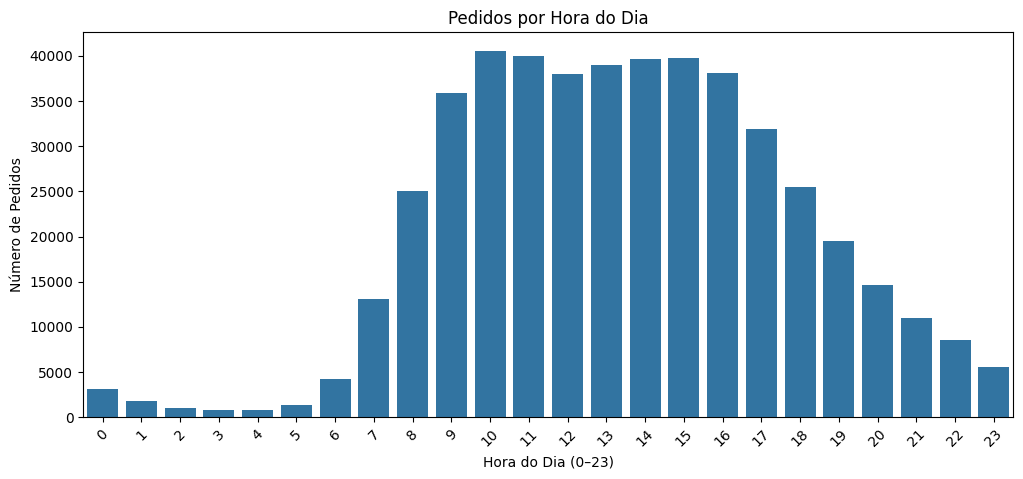

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 5))
sns.countplot(x='order_hour_of_day', data=df_inscart_orders)
plt.title('Pedidos por Hora do Dia')
plt.xlabel('Hora do Dia (0–23)')
plt.ylabel('Número de Pedidos')
plt.xticks(rotation=45)
plt.show()


Escreva suas conclusões aqui

O pico comeca depois das 18 e vai caindo depois das 19.. 


### [A3] Em que dia da semana as pessoas compram produtos alimentícios?

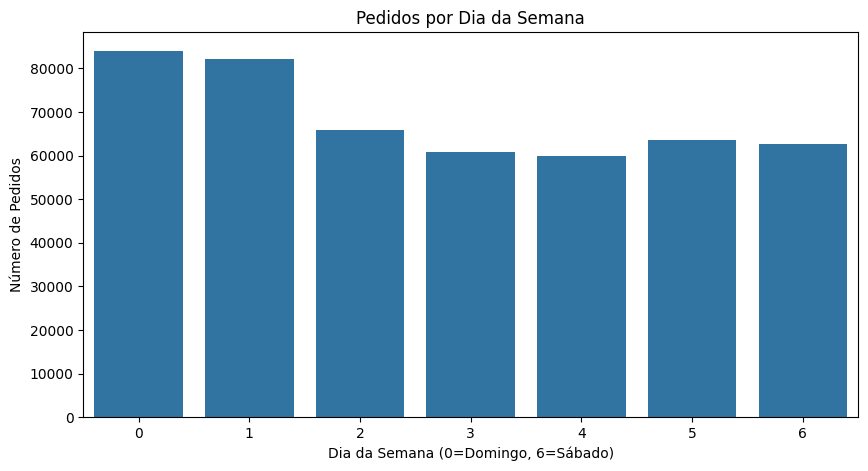

In [37]:
plt.figure(figsize=(10, 5))
sns.countplot(x='order_dow', data=df_inscart_orders)
plt.title('Pedidos por Dia da Semana')
plt.xlabel('Dia da Semana (0=Domingo, 6=Sábado)')
plt.ylabel('Número de Pedidos')
plt.show()


Escreva suas conclusões aqui

Domingo e segunda sao os melhors dias, porem nao sai muito da media.. 

### [A4] Quanto tempo as pessoas esperam até fazer outro pedido?

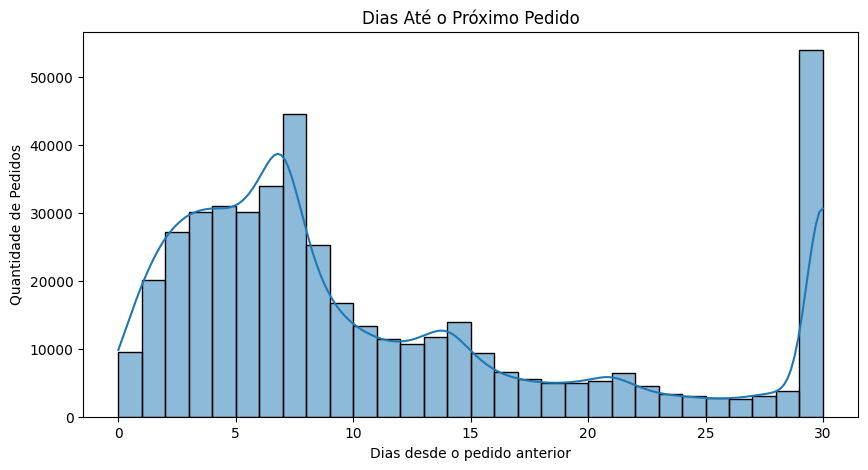

Mínimo: 0.0
Máximo: 30.0


In [38]:
plt.figure(figsize=(10, 5))
sns.histplot(df_inscart_orders['days_since_prior_order'], bins=30, kde=True)
plt.title('Dias Até o Próximo Pedido')
plt.xlabel('Dias desde o pedido anterior')
plt.ylabel('Quantidade de Pedidos')
plt.show()

# Valores mínimo e máximo
print("Mínimo:", df_inscart_orders['days_since_prior_order'].min())
print("Máximo:", df_inscart_orders['days_since_prior_order'].max())

Escreva suas conclusões aqui

Depois do 10 dia apos a compra a recorrencia cai, porem temos pico de movimento nos primeiros 7 dias e ainda mais depois em 30 dias.. 

# [B] Médio (é necessário concluir tudo para passar)

1.	Há alguma diferença nas distribuições de `'order_hour_of_day'` nas quartas e sábados? Construa gráficos de barras para ambos os dias no mesmo gráfico e descreva as diferenças que você notou.
2.	Construa um gráfico de distribuição para o número de pedidos que os clientes fazem (ou seja, quantos clientes fizeram apenas 1 pedido, quantos fizeram apenas 2, quantos apenas 3, etc.)
3.	Quais são os 20 produtos comprados com mais frequência? Exiba os IDs e nomes.


### [B1] Diferenças nas quartas e sábados em `'order_hour_of_day'`. Crie gráficos de barras para ambos os dias e descreva as diferenças.

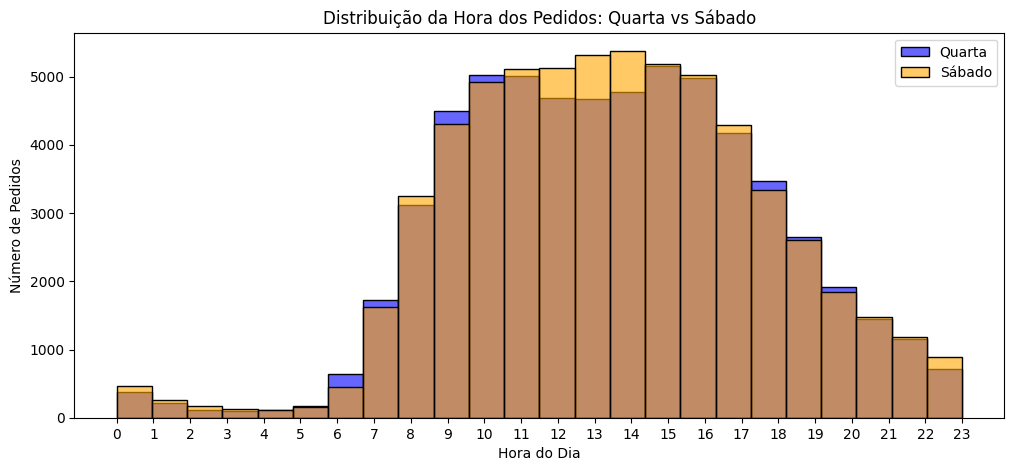

In [39]:
quartas_df_inscart_orders = df_inscart_orders[df_inscart_orders['order_dow'] == 3]
sabados_df_inscart_orders = df_inscart_orders[df_inscart_orders['order_dow'] == 6]


plt.figure(figsize=(12, 5))
sns.histplot(quartas_df_inscart_orders['order_hour_of_day'], bins=24, color='blue', label='Quarta', kde=False, stat='count', alpha=0.6)
sns.histplot(sabados_df_inscart_orders['order_hour_of_day'], bins=24, color='orange', label='Sábado', kde=False, stat='count', alpha=0.6)
plt.title('Distribuição da Hora dos Pedidos: Quarta vs Sábado')
plt.xlabel('Hora do Dia')
plt.ylabel('Número de Pedidos')
plt.legend()
plt.xticks(range(0, 24))
plt.show()

Escreva suas conclusões aqui

pico semelhante de 10 e 14, ambos os dias de 0 as 7 o numero de pedidos e bem baixo. quarta tem um periodo mais estavel e de 17 a 19, sabado tem um pico maior de 13 as 14

### [B2] Qual é a distribuição do número de pedidos por cliente?

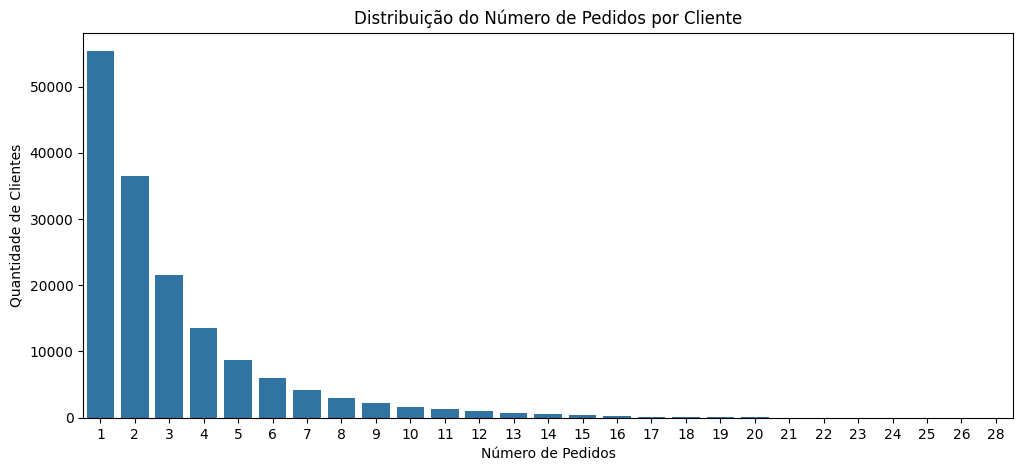

In [40]:
# Contar número de pedidos por cliente
pedidos_por_usuario = df_inscart_orders['user_id'].value_counts()

# Contar quantos clientes fizeram 1 pedido, 2, 3, etc.
distribuicao = pedidos_por_usuario.value_counts().sort_index()

# Gráfico
plt.figure(figsize=(12, 5))
sns.barplot(x=distribuicao.index, y=distribuicao.values)
plt.title('Distribuição do Número de Pedidos por Cliente')
plt.xlabel('Número de Pedidos')
plt.ylabel('Quantidade de Clientes')
plt.show()


Escreva suas conclusões aqui

A maioria dos clientes faz apenas 1 pedido. isso e mal!!! sinal que a loja tem pouca recorrencia. 

### [B3] Quais são os 20 produtos mais populares? Exiba os IDs e nomes.

C:\Users\Doit\AppData\Local\Temp\ipykernel_27144\2247420298.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


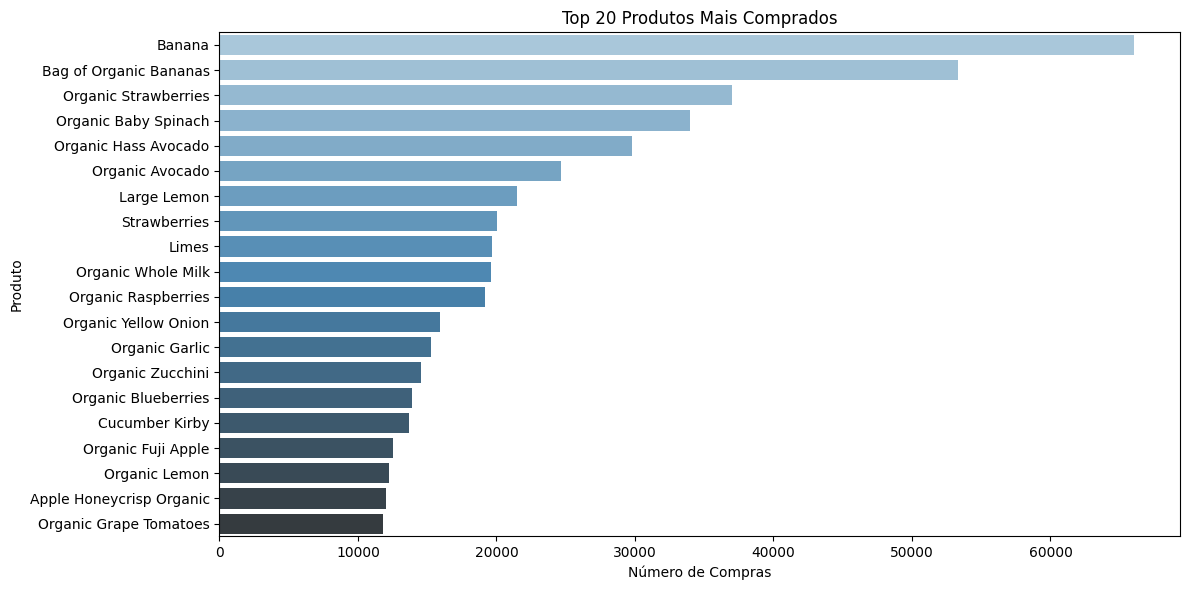

In [41]:
# 1. Contar quantas vezes cada produto foi comprado
vendas_por_produto = df_orders_products['product_id'].value_counts().reset_index()
vendas_por_produto.columns = ['product_id', 'total_compras']

# 2. Juntar com os nomes dos produtos (merge)
top_produtos = vendas_por_produto.merge(df_products[['product_id', 'product_name']], on='product_id', how='left')

# 3. Pegar os 20 mais vendidos
top_20 = top_produtos.head(20)

# 4. Plotar
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
sns.barplot(
    x='total_compras',
    y='product_name',
    data=top_20,
    palette='Blues_d',
    hue=None
)
plt.title('Top 20 Produtos Mais Comprados')
plt.xlabel('Número de Compras')
plt.ylabel('Produto')
plt.tight_layout()
plt.show()


Escreva suas conclusões aqui

Banana é o produto mais vendido disparado KKK , frutas e vegetais sao os mais populares. e padrao de consumidores buscando algo mais saudavel. 

# [C] Difícil (é necessário concluir pelo menos duas perguntas para passar)

1.	Quantos itens as pessoas normalmente compram em um pedido? Como fica a distribuição?
2.	Quais são os 20 principais itens incluídos mais frequentemente em pedidos repetidos? Exiba os IDs e nomes.
3.	Para cada produto, qual parcela de seus pedidos são repetidos? Crie uma tabela com colunas de ID e nome do produto e a proporção de pedidos repetidos.
4.	Para cada cliente, qual proporção de todos os seus pedidos são repetidos?
5.	Quais são os 20 principais itens que as pessoas colocam nos carrinhos antes de todos os outros? Exiba o ID do produto, nome e o número de vezes que ele foi o primeiro a ser adicionado a um carrinho.


### [C1] Quantos itens as pessoas normalmente compram em um pedido? Como fica a distribuição?

count    450046.000000
mean         10.098983
std           7.540206
min           1.000000
25%           5.000000
50%           8.000000
75%          14.000000
max         127.000000
Name: product_id, dtype: float64


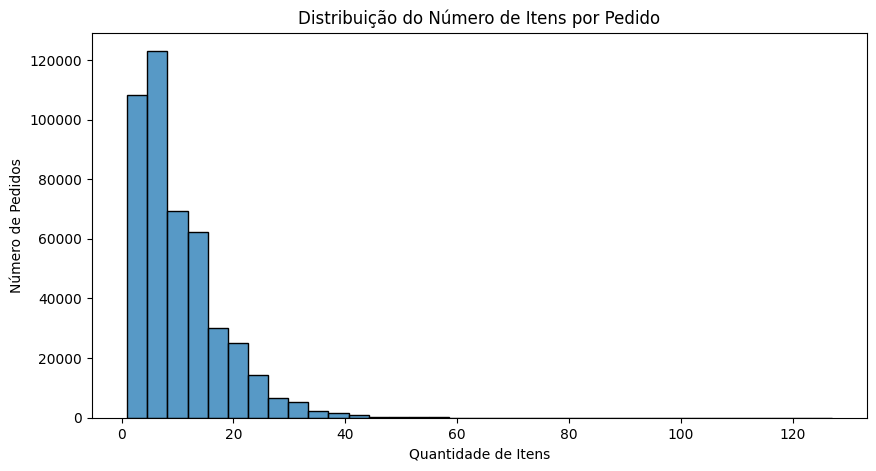

In [42]:
# Contar quantos produtos por pedido
itens_por_pedido = df_orders_products.groupby('order_id')['product_id'].count()


print(itens_por_pedido.describe())

plt.figure(figsize=(10, 5))
sns.histplot(itens_por_pedido, bins=35, kde=False)
plt.title('Distribuição do Número de Itens por Pedido')
plt.xlabel('Quantidade de Itens')
plt.ylabel('Número de Pedidos')
plt.show()

Escreva suas conclusões aqui

Total de pedidos analisados: 450.046

Média de itens por pedido: 10,1

Desvio padrão: 7,5 (alguma variação entre os pedidos)

Mínimo: 1 item

Mediana (50%): 8 itens

3º quartil (75%): 14 itens

Máximo: 127 itens em um único pedido

### [C2] Quais são os 20 principais itens incluídos com mais frequência em pedidos repetidos? Exiba os IDs e nomes.

    product_id              product_name  repeticoes
0        24852                    Banana       55763
1        13176    Bag of Organic Bananas       44450
2        21137      Organic Strawberries       28639
3        21903      Organic Baby Spinach       26233
4        47209      Organic Hass Avocado       23629
5        47766           Organic Avocado       18743
6        27845        Organic Whole Milk       16251
7        47626               Large Lemon       15044
8        27966       Organic Raspberries       14748
9        16797              Strawberries       13945
10       26209                     Limes       13327
11       22935      Organic Yellow Onion       11145
12       24964            Organic Garlic       10411
13       45007          Organic Zucchini       10076
14       49683            Cucumber Kirby        9538
15       28204        Organic Fuji Apple        8989
16        8277  Apple Honeycrisp Organic        8836
17       39275       Organic Blueberries      

C:\Users\Doit\AppData\Local\Temp\ipykernel_27144\704395965.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


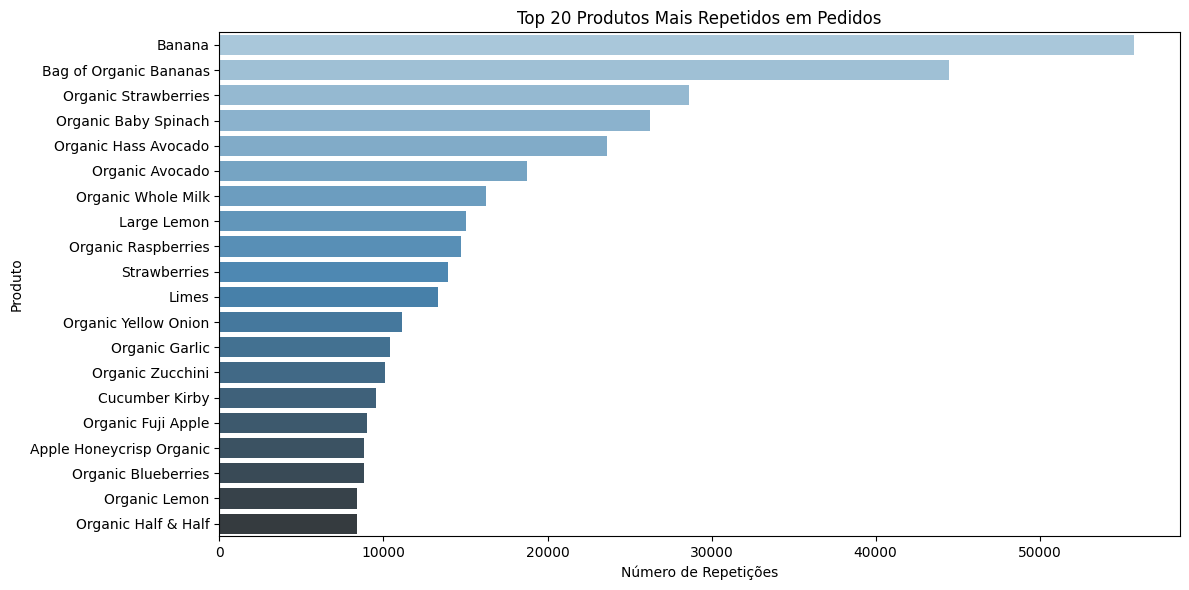

In [43]:
# Filtrar apenas os produtos que foram reorder == 1
repetidos = df_orders_products[df_orders_products['reordered'] == 1]

# Contar os mais frequentes
top_repetidos = repetidos['product_id'].value_counts().head(20).reset_index()
top_repetidos.columns = ['product_id', 'repeticoes']

# Juntar com nomes
top_repetidos = top_repetidos.merge(df_products[['product_id', 'product_name']], on='product_id')

print(top_repetidos[['product_id', 'product_name', 'repeticoes']])


plt.figure(figsize=(12, 6))
sns.barplot(
    x='repeticoes',
    y='product_name',
    data=top_repetidos,
    palette='Blues_d',
    hue=None
)
plt.title('Top 20 Produtos Mais Repetidos em Pedidos')
plt.xlabel('Número de Repetições')
plt.ylabel('Produto')
plt.tight_layout()
plt.show()

Escreva suas conclusões aqui

Banana, Morango orgânico e Espinafre. Esses itens aparecem direto nos pedidos repetidos, o que mostra que a galera realmente gosta e recompra com frequência.

### [C3] Para cada produto, qual parcela de todos os pedidos dele são repetidos?

   product_id  proporcao_repetida  \
0           1            0.564286   
1           2            0.000000   
2           3            0.738095   
3           4            0.510204   
4           7            0.500000   

                                        product_name  
0                         Chocolate Sandwich Cookies  
1                                   All-Seasons Salt  
2               Robust Golden Unsweetened Oolong Tea  
3  Smart Ones Classic Favorites Mini Rigatoni Wit...  
4                     Pure Coconut Water With Orange  


C:\Users\Doit\AppData\Local\Temp\ipykernel_27144\801928572.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


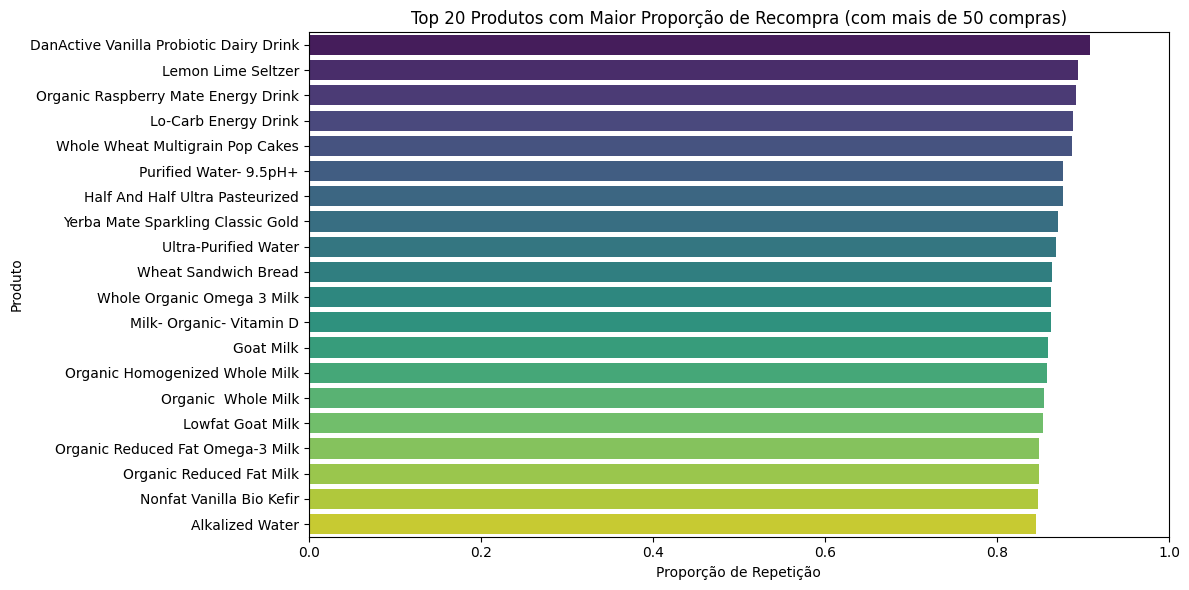

In [44]:

total_por_produto = df_orders_products.groupby('product_id')['reordered'].count()
repeticoes_por_produto = df_orders_products.groupby('product_id')['reordered'].sum()


proporcao = (repeticoes_por_produto / total_por_produto).reset_index()
proporcao.columns = ['product_id', 'proporcao_repetida']


proporcao = proporcao.merge(df_products[['product_id', 'product_name']], on='product_id')

print(proporcao.head())

# Selecionar os 20 
proporcao_filtrada = proporcao.merge(
    total_por_produto.reset_index(), on='product_id'
)
proporcao_filtrada = proporcao_filtrada[proporcao_filtrada['reordered'] >= 50]


top_recomprados = proporcao_filtrada.sort_values(by='proporcao_repetida', ascending=False).head(20)

# Gráfico
plt.figure(figsize=(12, 6))
sns.barplot(
    x='proporcao_repetida',
    y='product_name',
    data=top_recomprados,
    palette='viridis'
)
plt.title('Top 20 Produtos com Maior Proporção de Recompra (com mais de 50 compras)')
plt.xlabel('Proporção de Repetição')
plt.ylabel('Produto')
plt.xlim(0, 1)
plt.tight_layout()
plt.show()


bebidas estao no top, agua,leite, iorgute tem recompra boa , produto como organic whole milk, yerba mate sparkling tem otima regularidade tbm..

Escreva suas conclusões aqui

### [C4] Para cada cliente, qual proporção de todos os seus pedidos são repetidos?

   user_id  proporcao_repetida
0        2            0.038462
1        4            0.000000
2        5            0.666667
3        6            0.000000
4        7            0.928571


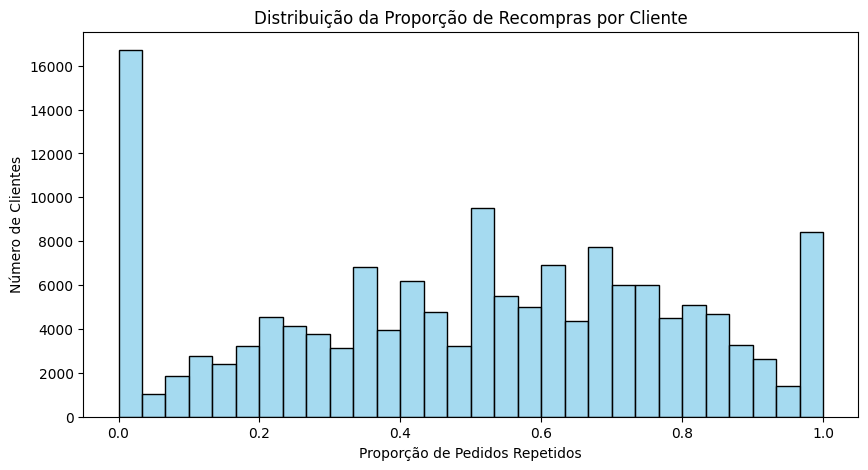

In [45]:
# Juntar pedidos com user_id
df = df_orders_products.merge(df_inscart_orders[['order_id', 'user_id']], on='order_id')

# Agrupar por cliente
total_por_cliente = df.groupby('user_id')['reordered'].count()
repeticoes_por_cliente = df.groupby('user_id')['reordered'].sum()

proporcao_clientes = (repeticoes_por_cliente / total_por_cliente).reset_index()
proporcao_clientes.columns = ['user_id', 'proporcao_repetida']

print(proporcao_clientes.head())

plt.figure(figsize=(10, 5))
sns.histplot(proporcao_clientes['proporcao_repetida'], bins=30, kde=False, color='skyblue')
plt.title('Distribuição da Proporção de Recompras por Cliente')
plt.xlabel('Proporção de Pedidos Repetidos')
plt.ylabel('Número de Clientes')
plt.show()


tem um pessoal muito fiel, com proporção de recompra de 1.0 e tem gente que nunca repete um produto. da pra investir tanto em novos produtos e tanto em manter o que ja estao sempre em mao

### [C5] Quais são os 20 principais itens que as pessoas colocam nos carrinhos antes de todos os outros?

    product_id                 product_name  vezes_como_primeiro
0        24852                       Banana                15562
1        13176       Bag of Organic Bananas                11026
2        27845           Organic Whole Milk                 4363
3        21137         Organic Strawberries                 3946
4        47209         Organic Hass Avocado                 3390
5        21903         Organic Baby Spinach                 3336
6        47766              Organic Avocado                 3044
7        19660                 Spring Water                 2336
8        16797                 Strawberries                 2308
9        27966          Organic Raspberries                 2024
10       44632   Sparkling Water Grapefruit                 1914
11       49235          Organic Half & Half                 1797
12       47626                  Large Lemon                 1737
13         196                         Soda                 1733
14       38689     Organi

C:\Users\Doit\AppData\Local\Temp\ipykernel_27144\3022744113.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


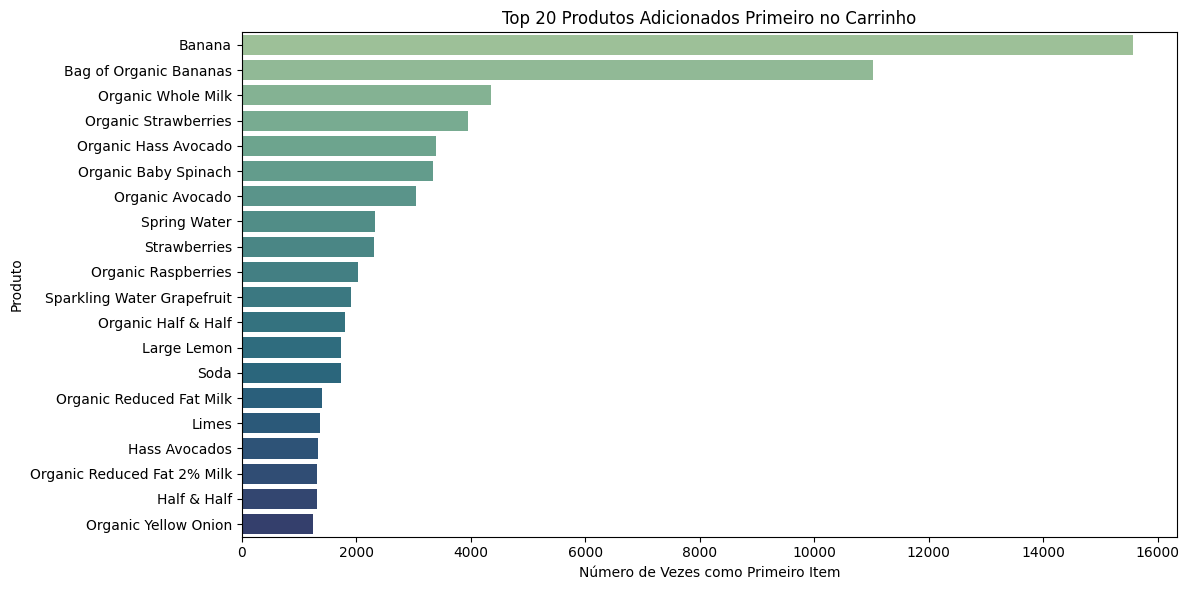

In [46]:
# Filtrar os produtos que foram o primeiro a entrar no carrinho
primeiros = df_orders_products[df_orders_products['add_to_cart_order'] == 1]

# Contar os mais comuns
top_primeiros = primeiros['product_id'].value_counts().head(20).reset_index()
top_primeiros.columns = ['product_id', 'vezes_como_primeiro']

# Juntar com nome
top_primeiros = top_primeiros.merge(df_products[['product_id', 'product_name']], on='product_id')

print(top_primeiros[['product_id', 'product_name', 'vezes_como_primeiro']])

plt.figure(figsize=(12, 6))
sns.barplot(
    x='vezes_como_primeiro',
    y='product_name',
    data=top_primeiros,
    palette='crest'
)
plt.title('Top 20 Produtos Adicionados Primeiro no Carrinho')
plt.xlabel('Número de Vezes como Primeiro Item')
plt.ylabel('Produto')
plt.tight_layout()
plt.show()


Banana seguindo forte em vendas. haha XD

Escreva suas conclusões aqui

# Conclusão geral do projeto:

Ao longo da análise, foi possível entender com mais profundidade o comportamento dos clientes da plataforma Instacart em relação às suas compras. Exploramos desde os produtos mais vendidos até os hábitos de recompra e as preferências de ordem no carrinho. Com base nisso, tiramos alguns aprendizados importantes.

🔎 Principais descobertas (prós):
Produtos frescos e orgânicos como banana, leite e morango lideram tanto em vendas quanto em recompra, o que mostra uma forte preferência dos clientes por itens saudáveis e básicos.

Muitos clientes têm comportamento recorrente, com vários apresentando alta proporção de pedidos repetidos — isso sugere fidelidade a certos produtos e abre espaço para ações de recomendação personalizada.

Os itens adicionados primeiro no carrinho também tendem a ser os mais vendidos e mais repetidos, reforçando a ideia de que são essenciais no dia a dia dos usuários.

A base de dados, mesmo com valores ausentes e duplicados incluídos intencionalmente, permitiu observar padrões claros de comportamento.

⚠️ Limitações e desafios (contras):
Alguns produtos com pouca quantidade de vendas apresentaram proporções de recompra elevadas, o que pode distorcer a análise se não houver filtragem por volume mínimo.

A ausência de informações como categoria de cliente, tempo entre pedidos ou valor da compra limitou a construção de perfis mais completos.

A presença de dados "missing" ou "unknown" (intencional) exigiu cuidados extras em cada etapa para evitar conclusões enviesadas.